In [121]:
cd datasets/

[Errno 2] No such file or directory: 'datasets/'
/home/nadia/datasets


# Téléchargement 
- `read_csv` : pour charger le fichier csv.
-  `[...]`:  pour le format de notre csv.
- la première colonne du CSV a pour index 0.
- `parse_date` :  Le format des dates sera déduit automatiquement 01/02/2020.
- `dayfirst` : En Usa le 01/02/2020 = 2 janvier et donc en Europe il faut preciser que le 01 = jour pour cela `dayfirst = True`.
- `sep`  et  `decimal`  : Si les colonnes ne sont pas séparées par des virgules, ou si le délimiteur des décimales n'est pas le point.
- `header`  : Si le fichier ne contient pas d'en-tête, alors il faudra préciser  `header=None`.


In [122]:
import pandas as pd
data1 = pd.read_csv("operations.csv")
data1= pd.read_csv("operations.csv",parse_dates=[1,2])
data = pd.read_csv("operations.csv",parse_dates=[1,2],header = None)
#data3 = pd.read_csv("operations.csv",parse_dates=[1,2],sep= ';',
#    decimal= ',', dayfirst=True)

# Renommer les colonnes 


In [123]:
data.columns = ['identifiant_transaction','date_operation','date_valeur','libelle','debit','credit','solde']

In [124]:
# Controle des colonnes
for c in ['date_operation','libelle','debit','credit']:
    if c not in data.columns:
        if (c in ['debit','credit'] and 'montant' not in data.columns) or \
        (c not in ['debit','credit']):
            msg = "Il vous manque la colonne '{}'. Attention aux majuscules "
            msg += "et minuscules dans le nom des colonnes!"
            raise Exception(msg.format(c))

# Suppression des colonnes innutiles

In [125]:
for c in data.columns:
    if c not in ['date_operation','libelle','debit','credit','montant']:
        del data[c]

# Ajout de la colonne 'montant' si besoin

In [126]:
# if 'montant' not in data.columns:
#    data["debit"] = data["debit"].fillna(0)
#    data["credit"] = data["credit"].fillna(0)
#    data["montant"] = data["debit"] + data["credit"]
#    del data["credit"], data["debit"]

# Création de la variable 'solde_avt_ope'

In [127]:
#data = data.sort_values("date_operation")
#amount = data["montant"]
#balance = amount.cumsum()
#balance = list(balance.values)
#last_val = balance[-1]
#balance = [0] + balance[:-1]
#data["solde_avt_ope"] = balance

# Création des autres variables

In [128]:
#data["annee"] = data["date_operation"].map(lambda d: d.year)
#data["mois"] = data["date_operation"].map(lambda d: d.month)
#data["jour"] = data["date_operation"].map(lambda d: d.day)
#data["jour_sem"] = data["date_operation"].map(lambda d: d.day_name)
#data["jour_sem_num"] = data["date_operation"].map(lambda d: d.weekday()+1)
#data["weekend"] = data["jour_sem"].isin(WEEKEND)
#data["quart_mois"] = [int((jour-1)*4/31)+1 for jour in data["jour"]]

# Enregistrement au format CSV

In [129]:
data.to_csv("operations_enrichies.csv",index=False)

# Les types des variables 
- les variables quantitative : représenteent une quantité ( ex : montant)
 - Discrète : nbre de valeurs possibles dénombrables (ex les nombres entiers : nbre des valeurs possibles est fini : 1, 2, 3).
 - Continue : les valeurs sont sur une echelle continue (infinité de valeurs possibles entre 10 et 1)
- Les variables qualitatives : les valeurs possibles sont des `catégorie` = `des modalités`
        

# Les représentation graphiques 
- Pour une variables quantitative discrète = diagramme en bâtons
- Pour une variable qualitative = diagramme en tuyaux d'orgue
- pour une variable continue = histogramme ( découpage en classe)

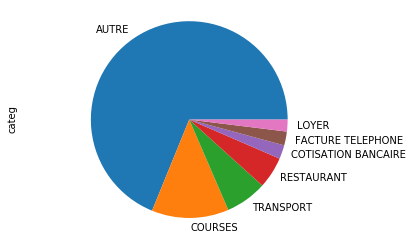

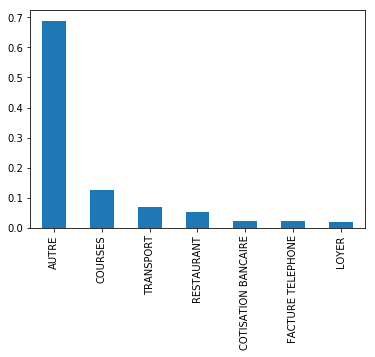

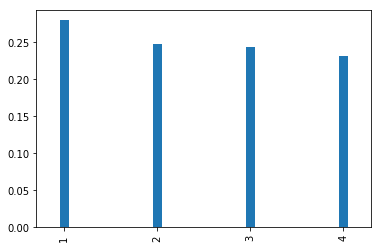

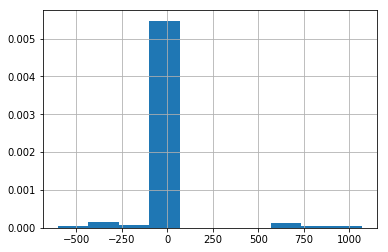

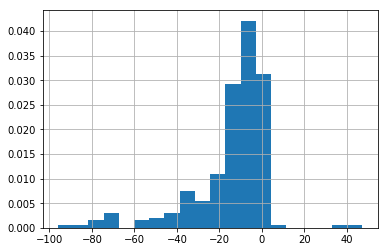

In [130]:
import matplotlib.pyplot as plt

# VARIABLE QUALITATIVE
# Diagramme en secteurs
data12["categ"].value_counts(normalize=True).plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

# Diagramme en tuyaux d'orgues
data12["categ"].value_counts(normalize=True).plot(kind='bar')
plt.show()

# VARIABLE QUANTITATIVE
# Diagramme en bâtons
data12["quart_mois"].value_counts(normalize=True).plot(kind='bar',width=0.1)
plt.show()

# Histogramme
data12["montant"].hist(density=True)
plt.show()
# Histogramme plus beau
data12[data12.montant.abs() < 100]["montant"].hist(density=True,bins=20)
plt.show()

# Les effectifs / La fréquence / La fréquence cumulée 

- `data12['categ'].value_counts()` = compter les effectifs des modalités dans la variable `categ`.
                                   = le nombre d'apparition des diffèrents mots dans `categ`.
- La fréquence = l'effectif / la taille de l'échantillion = `tab["effectif"] / len(data)`
- La fréquence cumulée = trier les lignes selon les modalités de notre variable et puis calculer la somme cumulée des fréquences (La fréquence cumulée d'une modalité ai , c'est juste la somme des fréquences de toutes les modalités inférieures ou égales à ai).

In [160]:
import pandas as pd
data12 = pd.read_csv("ops.csv")
data12['categ'].value_counts()

AUTRE                  212
COURSES                 39
TRANSPORT               21
RESTAURANT              16
COTISATION BANCAIRE      7
FACTURE TELEPHONE        7
LOYER                    6
Name: categ, dtype: int64

In [161]:
effectifs = data12["categ"].value_counts()
modalites = effectifs.index

In [162]:
tab = pd.DataFrame(modalites, columns = ["categ"]) #création du tableau à partir des modalités
print(tab)

                 categ
0                AUTRE
1              COURSES
2            TRANSPORT
3           RESTAURANT
4  COTISATION BANCAIRE
5    FACTURE TELEPHONE
6                LOYER


In [163]:
tab["n"] = effectifs.values
tab

,categ,n
0,AUTRE,212
1,COURSES,39
2,TRANSPORT,21
3,RESTAURANT,16
4,COTISATION BANCAIRE,7
5,FACTURE TELEPHONE,7
6,LOYER,6


In [164]:
tab["frequence"] = tab["n"]/ len(data12)
tab

,categ,n,frequence
0,AUTRE,212,0.688312
1,COURSES,39,0.126623
2,TRANSPORT,21,0.068182
3,RESTAURANT,16,0.051948
4,COTISATION BANCAIRE,7,0.022727
5,FACTURE TELEPHONE,7,0.022727
6,LOYER,6,0.019481


In [167]:
tab = tab.sort_values("categ") # tri des valeurs de la variable X (croissant)
tab["frequence cumulée"] = tab["frequence"].cumsum()  # cumsum calcule la somme cumulée
tab

,categ,n,frequence,frequence cumulée
0,AUTRE,212,0.688312,0.688312
4,COTISATION BANCAIRE,7,0.022727,0.711039
1,COURSES,39,0.126623,0.837662
5,FACTURE TELEPHONE,7,0.022727,0.860390
6,LOYER,6,0.019481,0.879870
3,RESTAURANT,16,0.051948,0.931818
2,TRANSPORT,21,0.068182,1.000000


In [171]:
print("moy:\n",subset['montant'].mean())
print("med:\n",subset['montant'].median())
print("mod:\n",subset['montant'].mode())
print("var:\n",subset['montant'].var(ddof=0))
print("ect:\n",subset['montant'].std(ddof=0))

NameError: name 'subset' is not defined